# Machine Learning Model Building Workflow
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Pickle: https://docs.python.org/3/library/pickle.html
* Joblib : https://joblib.readthedocs.io/

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot
import seaborn as sns

import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

# Load Data

In [2]:
file_name = 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/income_data.csv'

# Load CSV File

data = pd.read_csv(file_name)
data.sample(20)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
22562,22577,45,Private,99971,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
10138,10141,24,Private,329408,11th,7,Never-married,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2110,2110,30,Private,203277,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
26490,1672,41,Private,157217,HS-grad,9,Separated,Craft-repair,Unmarried,White,Male,0.0,0.0,40.0,United-States,<=50K.
21033,21042,27,Private,192936,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
20581,20590,25,Private,141706,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1990,1990,19,Private,365640,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,45.0,?,<=50K
11280,11283,39,Self-emp-inc,241153,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
17127,17134,35,Federal-gov,103214,Doctorate,16,Never-married,Prof-specialty,Not-in-family,Amer-Indian-Eskimo,Female,0.0,0.0,60.0,United-States,>50K
13446,13451,40,State-gov,86912,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,>50K


# Pre-process Data for Training

In [3]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [4]:
data.dropna(how='any', axis=0, inplace=True)

In [5]:
data['class'].replace(' >50K.', ' >50K', inplace=True)
data['class'].replace(' <=50K.', ' <=50K', inplace=True)
data['y_act'] = np.where(data['class']==' >50K',1,0)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'y_act'],
      dtype='object')

In [7]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41094,NaN,NaN,NaN,38.6698,13.7482,17,28,37,48,90
workclass,41094,9,Private,28450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,41094,NaN,NaN,NaN,189650,105500,12285,117586,178109,237546,1.4904e+06
education,41094,16,HS-grad,13345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,41094,NaN,NaN,NaN,10.0794,2.56094,1,9,10,12,16
marital_status,41094,7,Married-civ-spouse,18770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,41094,15,Prof-specialty,5193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,41094,6,Husband,16520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,41094,5,White,35179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,41094,2,Male,27446,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create ID Column

In [8]:
data['id'] = data.index+1
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,y_act,id
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0,3
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0,4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41090,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K,0,41091
41091,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K,0,41092
41092,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,0,41093
41093,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K,0,41094


# Occupation as a Variable

In [9]:
data['occupation'].value_counts()

 Prof-specialty       5193
 Craft-repair         5111
 Exec-managerial      5080
 Adm-clerical         4793
 Sales                4642
 Other-service        4164
 Machine-op-inspct    2544
 ?                    2363
 Transport-moving     1979
 Handlers-cleaners    1698
 Farming-fishing      1254
 Tech-support         1218
 Protective-serv       831
 Priv-house-serv       211
 Armed-Forces           13
Name: occupation, dtype: int64

In [10]:
response = data.groupby(by=['occupation']).agg({'id': 'count', 'y_act': 'sum'})
response['%'] = response['y_act']/response['id'] 
response

,id,y_act,%
occupation,,,
?,2363,220,0.093102
Adm-clerical,4793,651,0.135823
Armed-Forces,13,4,0.307692
Craft-repair,5111,1156,0.226179
Exec-managerial,5080,2419,0.476181
Farming-fishing,1254,148,0.118022
Handlers-cleaners,1698,116,0.068316
Machine-op-inspct,2544,308,0.121069
Other-service,4164,179,0.042988


In [11]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
data['occupation_grp'] = data['occupation'].replace( ' ?', 'N/A')
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,y_act,id,occupation_grp
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0,1,Adm-clerical
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0,2,Exec-managerial
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0,3,Handlers-cleaners
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0,4,Handlers-cleaners
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0,5,Prof-specialty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41090,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K,0,41091,Prof-specialty
41091,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K,0,41092,N/A
41092,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K,0,41093,Prof-specialty
41093,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K,0,41094,Adm-clerical


In [13]:
data = data.join(pd.get_dummies(data['occupation_grp'], prefix='occupation'))

In [14]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'y_act', 'id', 'occupation_grp', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'occupation_N/A'],
      dtype='object')

<AxesSubplot:xlabel='occupation'>

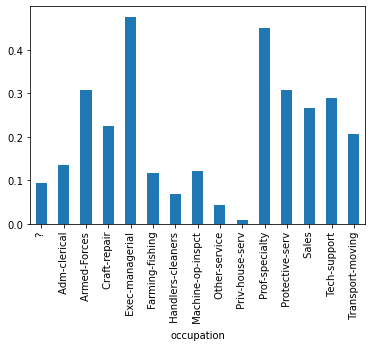

In [15]:
response['%'].plot(kind='bar')

# Gender as a Variable

In [16]:
data['sex'].value_counts()

 Male      27446
 Female    13648
Name: sex, dtype: int64

In [17]:
response = data.groupby(by=['sex']).agg({'id': 'count', 'y_act': 'sum'})
response

,id,y_act
sex,,
Female,13648,1481
Male,27446,8316


In [18]:
response['%'] = response['y_act']/response['id'] 
response

,id,y_act,%
sex,,,
Female,13648,1481,0.108514
Male,27446,8316,0.302995


In [19]:
data['is_male'] = np.where(data['sex']==' Male',1,0)

In [20]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [21]:
pd.crosstab(data['sex'], data['is_male'])

is_male,0,1
sex,,
Female,13648,0
Male,0,27446


In [22]:
X_variables = ['age',  'hours_per_week', 'education_num', 'is_male', 'occupation_ Handlers-cleaners', 'occupation_ Prof-specialty', 'occupation_ Exec-managerial', 'occupation_ Priv-house-serv']
data[X_variables].head()

,age,hours_per_week,education_num,is_male,occupation_ Handlers-cleaners,occupation_ Prof-specialty,occupation_ Exec-managerial,occupation_ Priv-house-serv
0,39,40.0,13,1,0,0,0,0
1,50,13.0,13,1,0,0,1,0
2,38,40.0,9,1,1,0,0,0
3,53,40.0,7,1,1,0,0,0
4,28,40.0,13,0,0,1,0,0


In [23]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int32

In [24]:
pd.crosstab(data[y_varibale], data['class'])

class,<=50K,>50K
y_act,,
0,31297,0
1,0,9797


In [25]:
X = data[X_variables].values
X

array([[39., 40., 13., ...,  0.,  0.,  0.],
       [50., 13., 13., ...,  0.,  1.,  0.],
       [38., 40.,  9., ...,  0.,  0.,  0.],
       ...,
       [38., 50., 13., ...,  1.,  0.,  0.],
       [44., 40., 13., ...,  0.,  0.,  0.],
       [35., 60., 13., ...,  0.,  1.,  0.]])

In [26]:
y = data[y_varibale].values
y

array([0, 0, 0, ..., 0, 0, 1])

# Data Pre-processing Function

In [27]:
def pre_processing(data):    
    data['id'] = data.index+1

    data['is_male'] = np.where(data['sex']==' Male',1,0)
    
    data['occupation_grp'] = data['occupation'].replace( ' ?', 'N/A')
    data = data.join(pd.get_dummies(data['occupation_grp'], prefix='occupation'))
    
    # Select Columns
    X_variables = ['age',  'hours_per_week', 'education_num', 'is_male', 'occupation_ Handlers-cleaners', 'occupation_ Prof-specialty', 'occupation_ Exec-managerial', 'occupation_ Priv-house-serv']
    
    # Assign 0 to missing columns
    for x in list(set(X_variables) - set(data.columns)):
        data[x] = 0
        
    return data[X_variables]

# Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


# Model Training Function

In [29]:
def model_train(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})

    accuracy = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
    precision = metrics.precision_score(test_result['y_act'], test_result['y_pred'], average='binary', pos_label=1)
    f1_score = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
    roc_auc = metrics.roc_auc_score(test_result['y_act'], test_result['y_pred_prob'])

    return ({'model_name':model_name, 
                   'model':model, 
                   'accuracy':accuracy, 
                   'precision':precision,
                  'f1_score':f1_score,
                  'roc_auc':roc_auc,
                  })

In [30]:
model0 = model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf_new', X_train, y_train, X_test, y_test)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    2.6s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    2.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.3s finished


In [31]:
model0

{'model_name': 'rf_new',
 'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=10, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
                        oob_score=False, random_state=None, verbose=1,
                        warm_start=False),
 'accuracy': 0.8119068862032606,
 'precision': 0.6682874122096164,
 'f1_score': 0.7956647728143794,
 'roc_auc': 0.8407667553308787}

# Fitting Multipe Models with Different Hyperparamaters

## [A] Manualy explore hyperparameter space

In [32]:
models = []
models.append(model_train(LogisticRegression(n_jobs=3, verbose=1), 'lgr1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=100, max_depth=None, n_jobs=3, verbose=1), 'rf1', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=3, verbose=1), 'rf2', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=10, n_jobs=3, verbose=1), 'rf3', X_train, y_train, X_test, y_test))
models.append(model_train(RandomForestClassifier(n_estimators=500, max_depth=20, n_jobs=3, verbose=1), 'rf4', X_train, y_train, X_test, y_test))
models = pd.DataFrame(models)
models

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 out of   1 | elapsed:    1.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]

,model_name,model,accuracy,precision,f1_score,roc_auc
0,lgr1,"LogisticRegression(C=1.0, class_weight=None, d...",0.804445,0.651628,0.785463,0.820745
1,rf1,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.787655,0.572973,0.776737,0.793925
2,rf2,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.790413,0.580631,0.779636,0.796631
3,rf3,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.811745,0.666846,0.795684,0.840818
4,rf4,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.794468,0.594708,0.782717,0.805658


## [B] Use of Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,500], 'max_depth': [None, 10, 20]}
gs_model = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=2, verbose=3, pre_dispatch=2)
gs_model.fit(X_train, y_train)          

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [34]:
# Best Model Paramaters
print(gs_model.best_params_) 

{'max_depth': 10, 'n_estimators': 100}


In [35]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = gs_model.predict(X_test) 

print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      9387
           1       0.67      0.42      0.52      2942

    accuracy                           0.81     12329
   macro avg       0.76      0.68      0.70     12329
weighted avg       0.80      0.81      0.80     12329

[[8788  599]
 [1708 1234]]


# Select Best Model

In [36]:
# Select best model 
model = models.query("model_name=='rf3'")
model 

,model_name,model,accuracy,precision,f1_score,roc_auc
3,rf3,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.811745,0.666846,0.795684,0.840818


In [37]:
model = model['model'].values[0]
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

# Saving Best Model

## [A] Use Pickle

In [38]:
import pickle

save_file = 'model_rf3_test.pickle'
pickle.dump(model, open(save_file, 'wb'))

In [39]:
# loading from file
model_ = pickle.load(open(save_file, 'rb'))
model_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

## [B] Use Joblib (supports parallelization)

In [40]:
import joblib

save_file = 'model_rf3_test.joblib'
joblib.dump(model, open(save_file, 'wb'))

In [41]:
# loading from file
model_ = joblib.load(save_file)
model_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=3,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

# Predict on a Sample Data

In [42]:
sample_input = data[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class']].sample(10)
sample_input

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
27209,46,Private,343579,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,77.0,United-States,<=50K
17795,43,Private,336042,HS-grad,9,Separated,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
13461,42,Self-emp-not-inc,24763,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024.0,0.0,40.0,United-States,>50K
2427,20,?,287681,Some-college,10,Never-married,?,Own-child,White,Male,0.0,0.0,36.0,United-States,<=50K
39993,32,Self-emp-inc,225053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K
33340,22,Private,150683,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
13786,52,Self-emp-not-inc,217210,HS-grad,9,Widowed,Other-service,Other-relative,Black,Female,0.0,0.0,40.0,United-States,<=50K
33913,20,Private,171156,Some-college,10,Never-married,Sales,Unmarried,White,Female,0.0,0.0,35.0,United-States,<=50K
19472,23,Private,184271,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
231,41,Private,130408,HS-grad,9,Divorced,Sales,Unmarried,Black,Female,0.0,0.0,38.0,United-States,<=50K


In [43]:
pre_processing(sample_input)

,age,hours_per_week,education_num,is_male,occupation_ Handlers-cleaners,occupation_ Prof-specialty,occupation_ Exec-managerial,occupation_ Priv-house-serv
27209,46,77.0,13,1,0,0,0,0
17795,43,40.0,9,1,0,0,0,0
13461,42,40.0,16,1,0,1,0,0
2427,20,36.0,10,1,0,0,0,0
39993,32,60.0,13,1,0,0,1,0
33340,22,20.0,9,1,0,0,0,0
13786,52,40.0,9,0,0,0,0,0
33913,20,35.0,10,0,0,0,0,0
19472,23,36.0,13,0,0,1,0,0
231,41,38.0,9,0,0,0,0,0


In [44]:
model.predict_proba(pre_processing(sample_input))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([[0.42706519, 0.57293481],
       [0.72553459, 0.27446541],
       [0.21685527, 0.78314473],
       [0.9884127 , 0.0115873 ],
       [0.24324596, 0.75675404],
       [0.99324622, 0.00675378],
       [0.90338952, 0.09661048],
       [0.99371276, 0.00628724],
       [0.95526621, 0.04473379],
       [0.91406983, 0.08593017]])

# Score Function

In [45]:
def score(input_data, model):
    return model.predict_proba(input_data)

In [46]:
prediction = score(input_data=pre_processing(sample_input), model=model)
prediction

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([[0.42706519, 0.57293481],
       [0.72553459, 0.27446541],
       [0.21685527, 0.78314473],
       [0.9884127 , 0.0115873 ],
       [0.24324596, 0.75675404],
       [0.99324622, 0.00675378],
       [0.90338952, 0.09661048],
       [0.99371276, 0.00628724],
       [0.95526621, 0.04473379],
       [0.91406983, 0.08593017]])

# Post-processing Function for Prediction

In [47]:
def post_processing(prediction):
    if len(prediction)==1:
        return prediction[:, 1][0]
    else:
        return prediction[:, 1]

In [48]:
output = post_processing(score(input_data=pre_processing(sample_input), model=model))
output

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([0.57293481, 0.27446541, 0.78314473, 0.0115873 , 0.75675404,
       0.00675378, 0.09661048, 0.00628724, 0.04473379, 0.08593017])

In [49]:
# Create new column in input dataset
sample_input['prediction'] = post_processing(model.predict_proba(pre_processing(sample_input)))
sample_input

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,id,is_male,occupation_grp,prediction
27209,46,Private,343579,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,77.0,United-States,<=50K,27210,1,Craft-repair,0.572935
17795,43,Private,336042,HS-grad,9,Separated,Transport-moving,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,17796,1,Transport-moving,0.274465
13461,42,Self-emp-not-inc,24763,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024.0,0.0,40.0,United-States,>50K,13462,1,Prof-specialty,0.783145
2427,20,?,287681,Some-college,10,Never-married,?,Own-child,White,Male,0.0,0.0,36.0,United-States,<=50K,2428,1,N/A,0.011587
39993,32,Self-emp-inc,225053,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999.0,0.0,60.0,United-States,>50K,39994,1,Exec-managerial,0.756754
33340,22,Private,150683,HS-grad,9,Never-married,Transport-moving,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K,33341,1,Transport-moving,0.006754
13786,52,Self-emp-not-inc,217210,HS-grad,9,Widowed,Other-service,Other-relative,Black,Female,0.0,0.0,40.0,United-States,<=50K,13787,0,Other-service,0.096610
33913,20,Private,171156,Some-college,10,Never-married,Sales,Unmarried,White,Female,0.0,0.0,35.0,United-States,<=50K,33914,0,Sales,0.006287
19472,23,Private,184271,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K,19473,0,Prof-specialty,0.044734
231,41,Private,130408,HS-grad,9,Divorced,Sales,Unmarried,Black,Female,0.0,0.0,38.0,United-States,<=50K,232,0,Sales,0.085930


In [50]:
# Output value 
sample_output = post_processing(score(input_data=pre_processing(sample_input), model=model))
sample_output

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


array([0.57293481, 0.27446541, 0.78314473, 0.0115873 , 0.75675404,
       0.00675378, 0.09661048, 0.00628724, 0.04473379, 0.08593017])

# Prediction Function for Application (Inference Pipeline)

In [51]:
def app_prediction_function(input_data, model):
    return post_processing(score(input_data=pre_processing(input_data), model=model))

In [54]:
input_data = data[['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class']].sample(1)
print(input_data)
app_prediction_function(input_data, model)

       age workclass  fnlwgt   education  education_num marital_status  \
10680   46         ?  443179   Bachelors             13       Divorced   

      occupation    relationship    race      sex  capital_gain  capital_loss  \
10680          ?   Not-in-family   White   Female           0.0           0.0   

       hours_per_week  native_country   class  
10680             8.0   United-States   <=50K  


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


0.27175182244210305

## Sample Input as dictionary

In [55]:
input_data = input_data.to_dict(orient='records')[0]
input_data

{'age': 46,
 'workclass': ' ?',
 'fnlwgt': 443179,
 'education': ' Bachelors',
 'education_num': 13,
 'marital_status': ' Divorced',
 'occupation': ' ?',
 'relationship': ' Not-in-family',
 'race': ' White',
 'sex': ' Female',
 'capital_gain': 0.0,
 'capital_loss': 0.0,
 'hours_per_week': 8.0,
 'native_country': ' United-States',
 'class': ' <=50K',
 'id': 10681,
 'is_male': 0,
 'occupation_grp': 'N/A'}

## Convert Input Data to DataFrame

In [56]:
input_data = pd.DataFrame([input_data])
input_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,id,is_male,occupation_grp
0,46,?,443179,Bachelors,13,Divorced,?,Not-in-family,White,Female,0.0,0.0,8.0,United-States,<=50K,10681,0,N/A


## Get Prediction

In [57]:
app_prediction_function(input_data, model)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:    0.0s finished


0.27175182244210305

<hr>
Last update 2021-11-07 by Sumudu Tennakoon